In [50]:
%load_ext autoreload
%autoreload 2
import pickle
import glob
import sys, copy
import numpy as np
import pyccl as ccl
#sys.path.append('../modules/')
import ModelClusterObservables
import configparser
sys.path.append('../modules/')
import halo._halo_abundance
import matplotlib.pyplot as plt
def load(filename, **kwargs):
    with open(filename, 'rb') as fin:
        return pickle.load(fin, **kwargs)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
H0_true = 71
h = H0_true/100
Omega_b_true = 0.02258 / (h**2)
Omega_c_true = 0.1109 / (h**2)
Omega_m_true = Omega_b_true + Omega_c_true
sigma8_true = 0.8
ns_true = 0.963
from clmm import Cosmology
clmm_cosmology = Cosmology(H0 = H0_true, Omega_dm0 = Omega_c_true, Omega_b0 = Omega_b_true, Omega_k0 = 0.0)
ccl_cosmo = ccl.Cosmology(Omega_c = Omega_c_true, Omega_b = Omega_b_true,
                                        h = H0_true/100, sigma8 = sigma8_true, 
                                        n_s=ns_true, w0=-1, wa=0)
clmm_cosmology.be_cosmo = ccl_cosmo

In [59]:
default_config_capish = configparser.ConfigParser()
default_config_capish.read('../config/capish.ini')

['../config/capish.ini']

In [60]:
ClusterAbundanceObject = ModelClusterObservables.UniversePrediction( default_config=default_config_capish )

In [61]:
file = load('../../CLCosmo_Sim/cluster_mass_measurement/cluster-masses_1-halo=nfw+c-M=None_rmin=1.0-rmax=3.5_photoz=Truez.pkl')

In [62]:
logm = file['masses']['log10M200c_WL']
logm_err = file['masses']['err_log10M200c_WL']
c = file['masses']['c_w']
n = file['masses']['n_stack']
z = file['masses']['z_mean']
richness = file['masses']['obs_mean']

In [83]:
error_th = []
for k in range(len(n)):

    error_log10m_one_cluster = ClusterAbundanceObject.model_error_log10m_one_cluster_( 10**logm[k], c[k], z[k], ccl_cosmo, 
                                                                                      Rmin=1, Rmax=3.5, 
                                                                                       ngal_arcmin2=25, shape_noise=0.25, 
                                                                                      fLSS=0.,
                                                                                       delta=200, mass_def='critical', 
                                                                                       sigma_A_prior=0.00003,
                                                                                      sigma_c_prior=30)
    error_th.append(error_log10m_one_cluster)

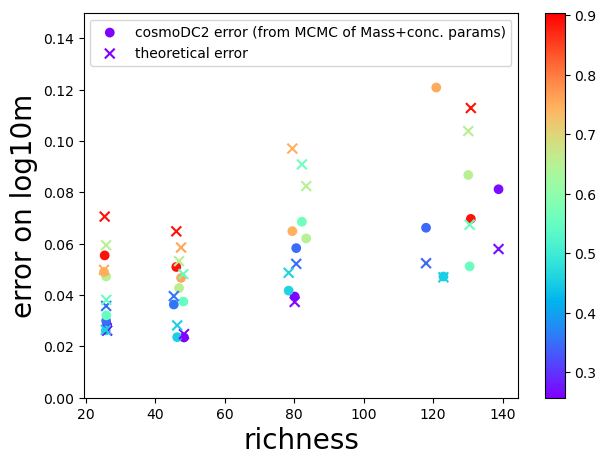

In [85]:
plt.figure(figsize=(7,5))
plt.scatter(richness, logm_err, c = z, marker='o', label = 'cosmoDC2 error (from MCMC of Mass+conc. params)', cmap='rainbow')
#plt.scatter(richness, error_th, c = z, marker='_')

plt.scatter(richness, np.array(error_th) / np.sqrt(n), c = z, marker='x', s=50, cmap='rainbow', label = 'theoretical error')
plt.colorbar()
plt.ylim(0, 0.15)
plt.ylabel('error on log10m', fontsize=20)
plt.xlabel('richness', fontsize=20)
plt.legend(loc='upper right')
